<h1 align = "center"> Heart Attack Analysis </h1>

### Project Content

1. [Introduction](#1)
    * 1.1 [Examining the Project Topic](#2)
    * 1.2 [Recognizing Variables In Datasets](#3)
2. [First Organization](#4)
    * 2.1 [Required Python libraries](#5)
        * 2.1.1 [Basic Libraries](#6)
    * 2.2 [Loading The Dataset](#7)
    * 2.3 [Initial analysis on the dataset](#8)
        * 2.3.1 [Analysis Outputs(1)](#9)
3. [Preparation for Exploratory Data Analysis (EDA)](#10)
    * 3.1 [Examining Missing Values](#11)
    * 3.2 [Examinig Unique Values](#12)
        * 3.2.1 [Analysis Outputs(2)](#13)
    * 3.3 [Separating variables (Numeric or Categorical)](#14)
    * 3.4 [Examining Statistical of Variables](#15)
4. [Exploratory Data Analysis(EDA)](#16)
    * 4.1 [Uni-variate Analysis](#17)
        * 4.1.1 [Numerical Variables(Analysis with Distplot)](#18)
            * 4.1.1.1 [Analysis Outputs(4)](#19)
        * 4.1.2 [Categorical Variables(Analysis with Pie Chart)](#19)
            * 4.1.2.1 [Analysis Outputs(5)](#20)
            * 4.1.2.2 [Examining the Missing Data According to the Analysis Result](#21)

### 1. Introdcution <a id = 1 ></a>

#### 1.1 Examining the Project Topic <a id = 2 ></a>

#### 1.2 Recognizing Variables In Datasets <a id = 3 ></a>

Variable definitions in the Dataset

1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect
14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

### First Organization <a id = 4 ></a>

#### 2.1 Required Python libraries <a id=5 ></a>

#### 2.1.1 Basic libraries <a id = 6 ></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv



#### 2.2 Loading The Dataset <a id= 7></a>

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### 2.3 Initial analysis on the dataset <a id= 8 ></a>

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
new_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach','exang', 'oldpeak', 
               'slope', 'ca', 'thal', 'target']

In [6]:
df.columns = new_columns

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
print('Shape of Dataset: ', df.shape)

Shape of Dataset:  (303, 14)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### 2.3.1 Analysis Outputs(1) <a id= 9 ></a>

    The data set consists of 303 rows and 14 columns.
    The type of all the variables in the data set are in numerical format.
    According to first impression, there is no missing value (NaN value) in the data set. 

#### 3. Preparation for Exploratory Data Analysis (EDA) <a id = 10 ></a>

#### 3.1 Examining Missing Values <a id = 11></a>

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

####   <a id = 10 ></a> 

In [11]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ['Total Missing Values'])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


<AxesSubplot:>

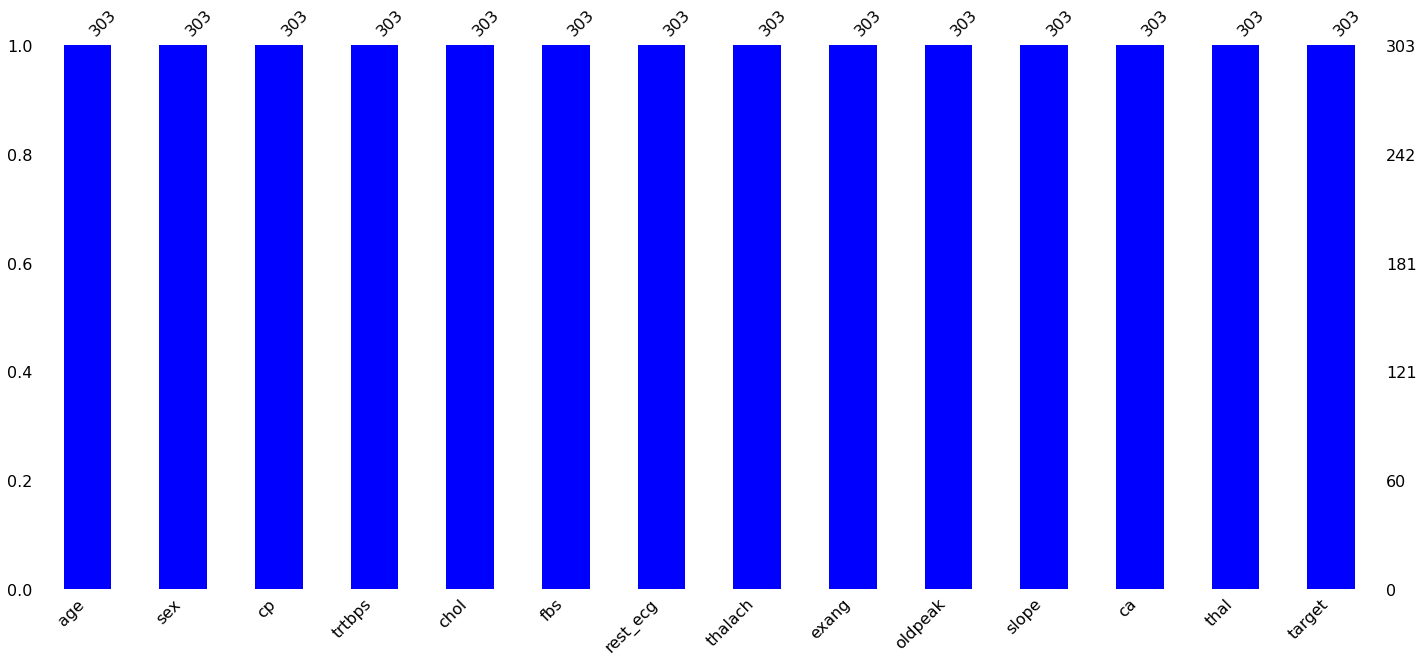

In [12]:
import missingno
missingno.bar(df, color='b')

#### 3.2 Examinig Unique Values <a id=12></a>

In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
unique_number = []

for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)
    
pd.DataFrame(unique_number, index = df.columns, columns = ['Total Unique Values'])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


#### 3.2.1 Analysis Outputs(2) <a id=13></a>

    * According to the result from the unique value dataframe:
    * We determined the variables with few unique values as categorical variables, and the variables with high unique values as numeric variables.

#### 3.3 Separating variables (Numeric or Categorical)<a id = 14></a>

In [15]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
numeric_var = ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
categorical_var = ['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca','thal', 'target' ]

#### 3.4 Examining Statistical of Variables <a id = 15></a>

In [17]:
df[numeric_var].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


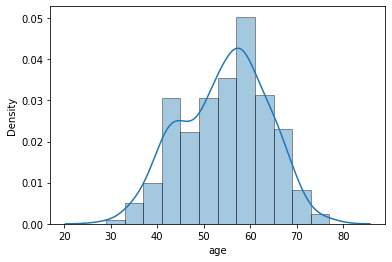

In [18]:
sns.distplot(df['age'], hist_kws = dict(linewidth = 1, edgecolor = 'k'));

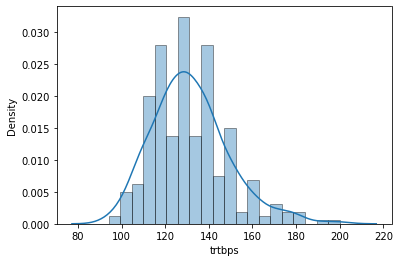

In [19]:
sns.distplot(df['trtbps'], hist_kws = dict(linewidth = 1, edgecolor = 'k'), bins = 20);

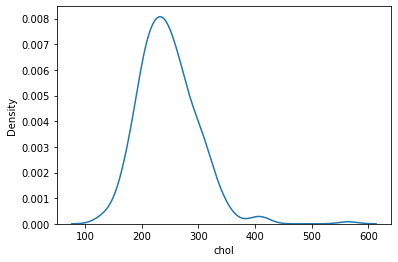

In [20]:
sns.distplot(df['chol'], hist = False);

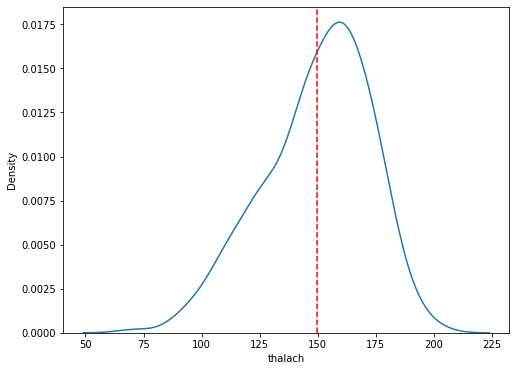

In [21]:
fig, ax = plt.subplots(figsize = (8,6))
sns.distplot(df['thalach'], hist = False, ax=ax)
ax.axvline(df['thalach'].mean(), color ='r', ls='--');

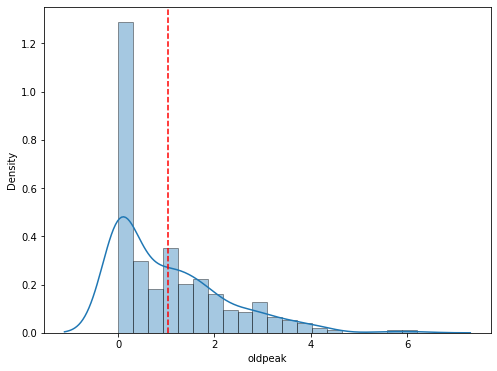

In [22]:
x, y = plt.subplots(figsize = (8,6))
sns.distplot(df['oldpeak'], hist_kws = dict(linewidth = 1, edgecolor = 'k'), bins = 20, ax = y)
y.axvline(df['oldpeak'].mean(), color ='r', ls='--');

#### 4. Exploratory Data Analysis(EDA) <a id = 16></a>

#### 4.1 Uni-variate Analysis <a id = 17></a>

#### 4.1.1 Numerical Variables(Analysis with Distplot) <a id = 18></a>

In [23]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [24]:
numeric_axis_name = ['Age of the Patient', 'Resting Blood Pressure', 'Cholesterol', 'Maximum Heart Rate Achived', 'ST Depression']

In [25]:
list(zip(numeric_var,numeric_axis_name))

[('age', 'Age of the Patient'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Maximum Heart Rate Achived'),
 ('oldpeak', 'ST Depression')]

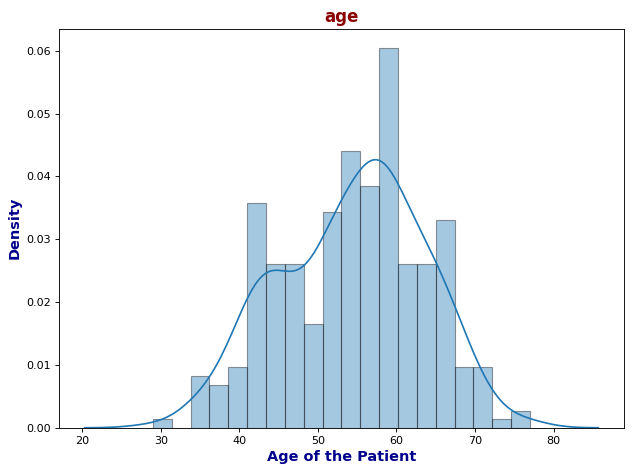

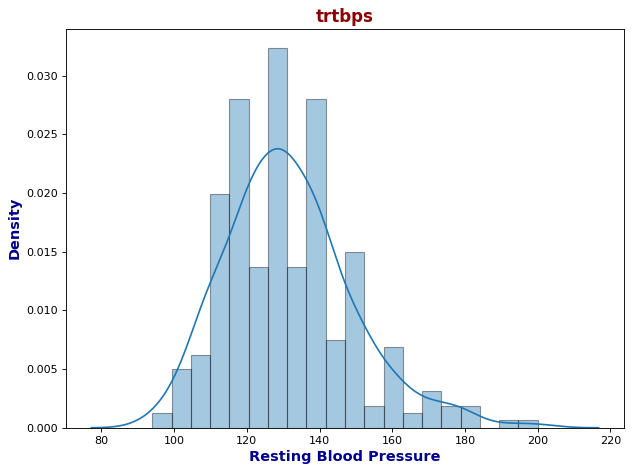

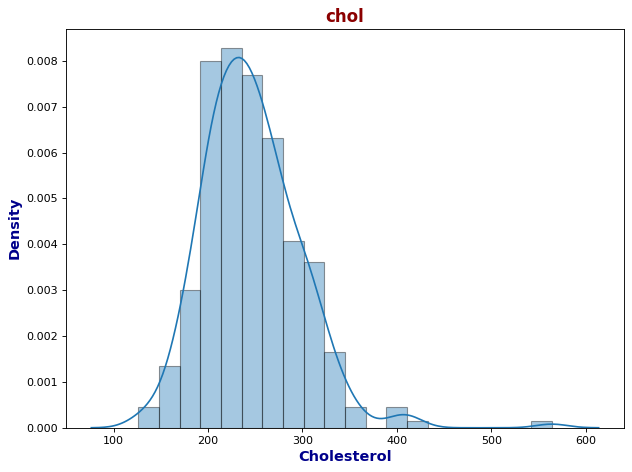

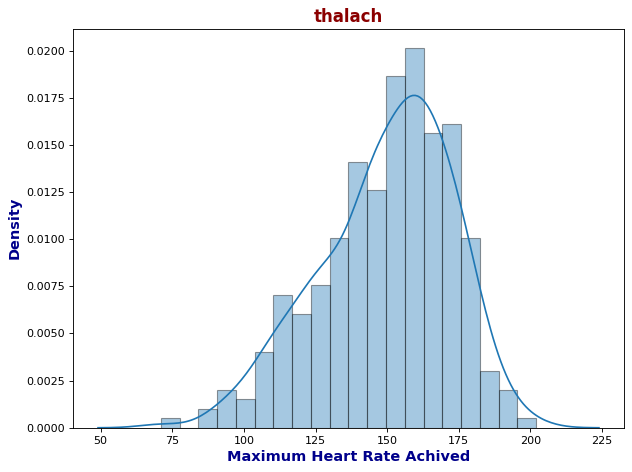

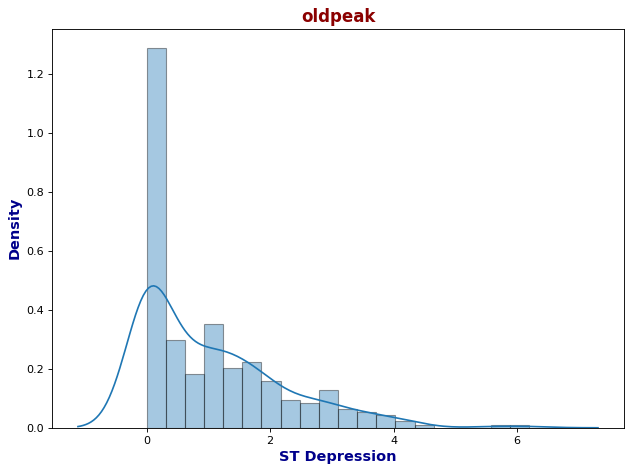

In [26]:
title_font = {'family':'arial', 'color':'darkred', 'weight':'bold', 'size': 15}
axis_font = {'family':'arial', 'color':'darkblue', 'weight':'bold', 'size': 13}


for i,z in list(zip(numeric_var,numeric_axis_name)):
    plt.figure(figsize = (8,6), dpi = 80)
    sns.distplot(df[i], hist_kws = dict(linewidth = 1, edgecolor = 'k'), bins = 20)
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel('Density', fontdict = axis_font)
    
    plt.tight_layout();

#### 4.1.1.1 Analysis Outputs(4)<a id=19></a>

#### 4.1.2 Categorical Variables(Analysis with Pie Chart)<a id=19></a>

In [27]:
categorical_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [28]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

In [29]:
list(zip(categorical_var, categoric_axis_name))

[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [30]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [31]:
list(df['cp'].value_counts())

[143, 87, 50, 23]

In [32]:
list(df['cp'].value_counts().index)

[0, 2, 1, 3]

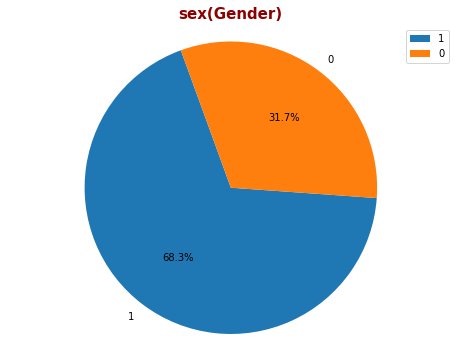

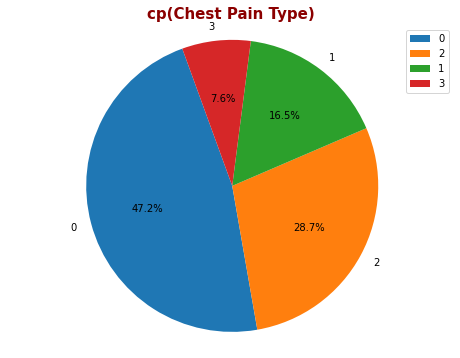

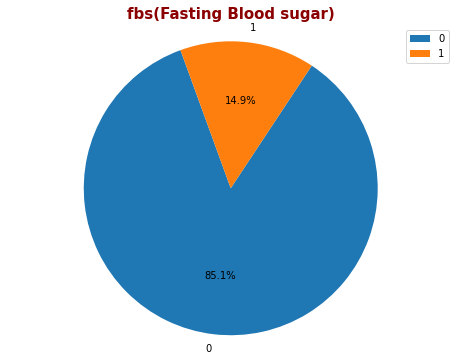

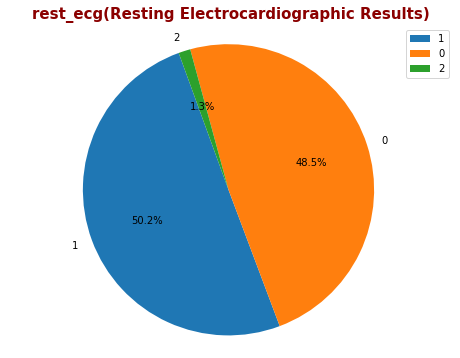

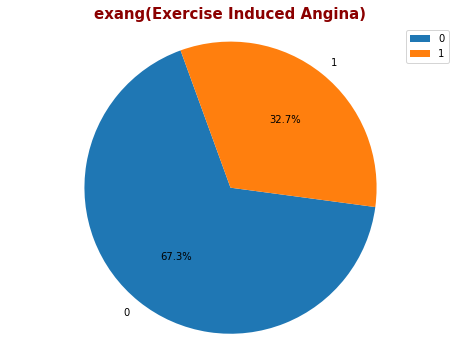

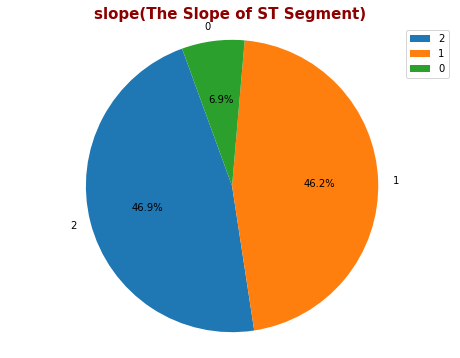

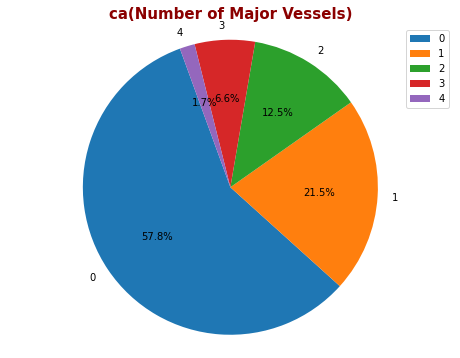

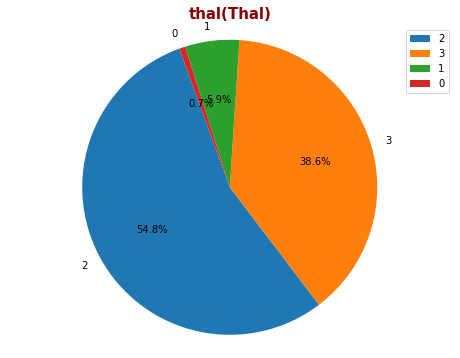

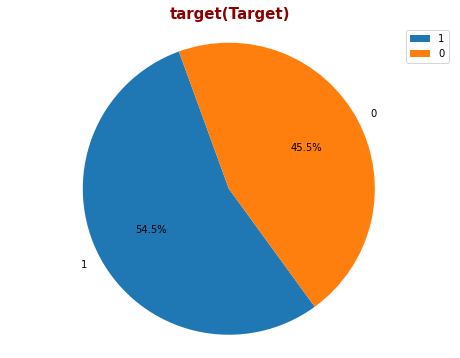

In [33]:
title_font = {'family': 'arial', 'color':'darkred', 'weight':'bold', 'size':15}
axis_font = {'family': 'arial', 'color':'darkblue', 'weight':'bold', 'size': 13}

for i, z in list(zip(categorical_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8,6))
    
    observation_values = list(df[i].value_counts().index)
    total_obervation_values = list(df[i].value_counts())
    
    ax.pie(total_obervation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    
    ax.axis('equal')
    
    plt.title((i + "(" + z + ")"), fontdict = title_font)
    plt.legend()
    plt.show()
    

####  4.1.2.1 Analysis Outputs(5)<a id = 20></a>

####  4.1.2.2 Examining the Missing Data According to the Analysis Result<a id = 21></a>

In [34]:
df[df['thal']==0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [35]:
df['thal'] = df['thal'].replace(0, np.nan)

In [36]:
df.loc[[48, 281]]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [37]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ['Total Missing Values'])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [38]:
df['thal'].fillna(2, inplace = True)

In [39]:
df.loc[[48, 281]]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [40]:
df['thal'] = pd.to_numeric(df['thal'], downcast = 'integer')

In [41]:
df.loc[[48, 281]]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2,0


In [42]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ['Total Missing Values'])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [43]:
df['thal'].value_counts()

2    168
3    117
1     18
Name: thal, dtype: int64

#### 4.2 Bi-variate Analysis

In [44]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [45]:
numeric_var.append("target")

In [46]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [47]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest_ecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

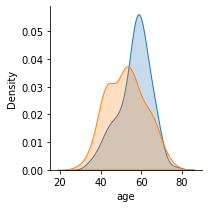

In [48]:
g = sns.FacetGrid(df, hue='target')
g = g.map(sns.kdeplot, 'age', shade=True)

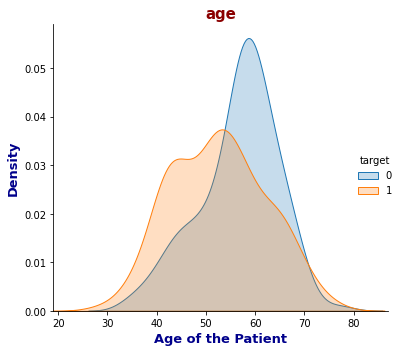

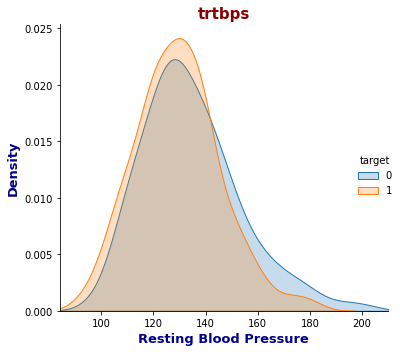

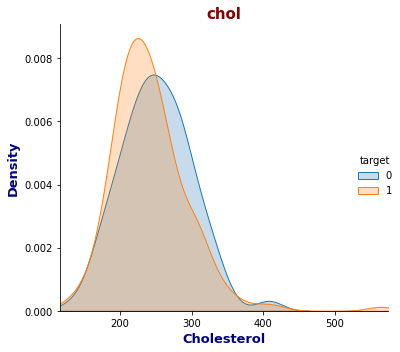

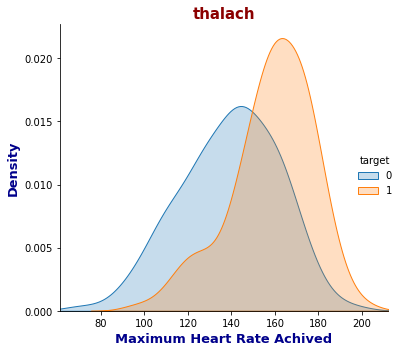

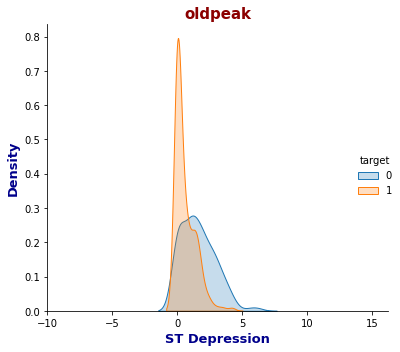

In [49]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i,z in list(zip(numeric_var, numeric_axis_name)):
    graph = sns.FacetGrid(df[numeric_var], hue = 'target', height=5, xlim=((df[i].min()-10), (df[i].max()+10)))
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()
    
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [50]:
df[numeric_var].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [51]:
df[numeric_var].corr()['target']

age       -0.225439
trtbps    -0.144931
chol      -0.085239
thalach    0.421741
oldpeak   -0.430696
target     1.000000
Name: target, dtype: float64

In [52]:
df[numeric_var].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### 4.2.2 Categorical Variables - Target Variable(Analysis with Count Plot)

In [53]:
categorical_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

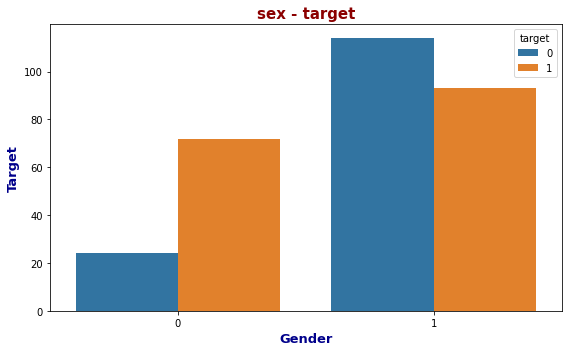

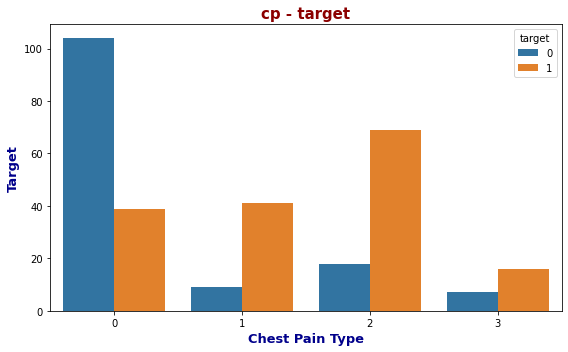

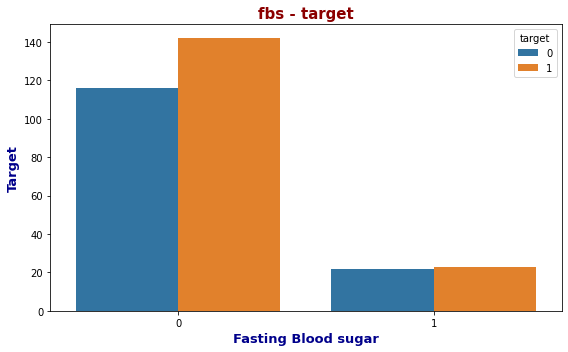

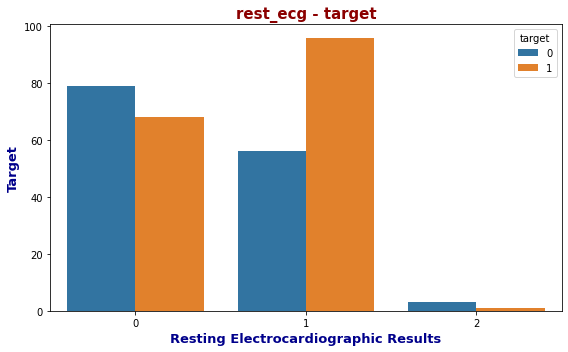

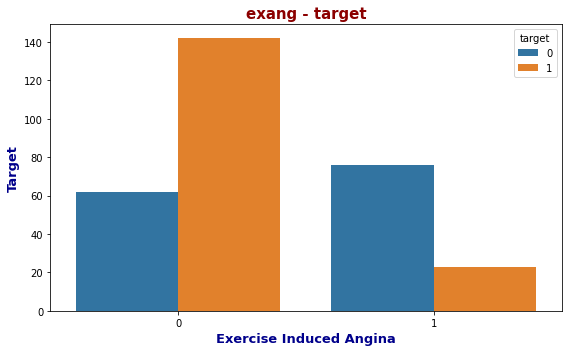

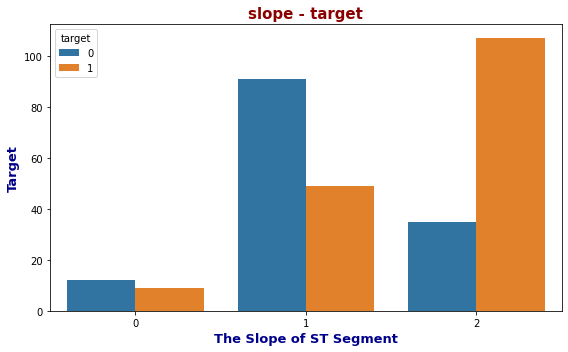

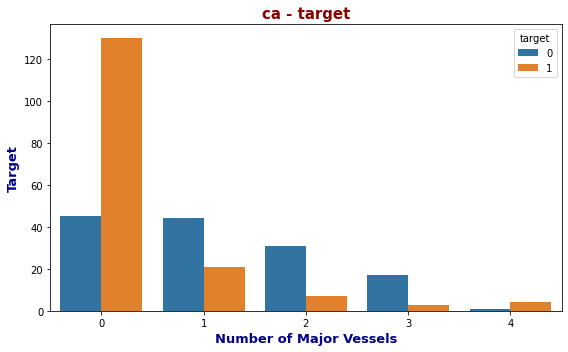

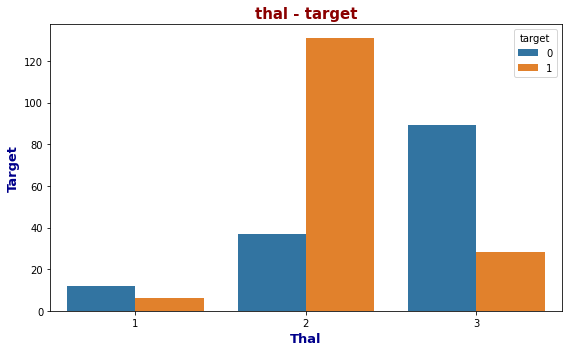

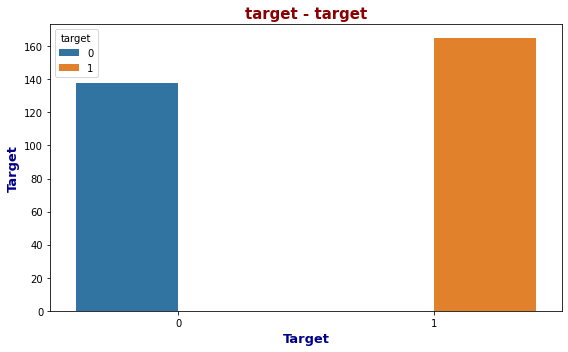

In [54]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i,z in list(zip(categorical_var, categoric_axis_name)):
    plt.figure(figsize = (8,5))
    sns.countplot(i, data=df[categorical_var], hue='target')
    
    plt.title(i + " - target", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Target", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [55]:
df[categorical_var].corr()['target']

sex        -0.280937
cp          0.433798
fbs        -0.028046
rest_ecg    0.137230
exang      -0.436757
slope       0.345877
ca         -0.391724
thal       -0.363322
target      1.000000
Name: target, dtype: float64

In [56]:
df[categorical_var].corr().iloc[:,[-1]]

,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


#### 4.2.3 Examining Numeric Variables Among Themselves(Analysis with Pair Plot)

In [57]:
numeric_var

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [58]:
numeric_var.remove('target')

In [59]:
df[numeric_var].head()

,age,trtbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


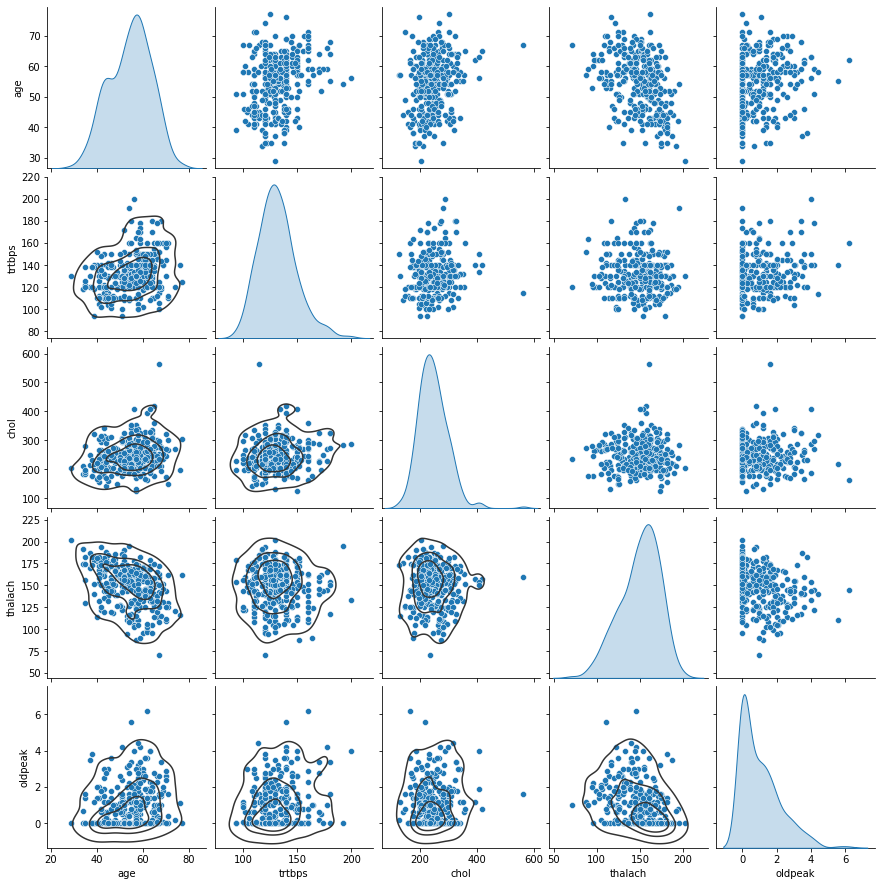

In [60]:
graph = sns.pairplot(df[numeric_var], diag_kind='kde')
graph.map_lower(sns.kdeplot, levels=4, color=".2");

#### 4.2.4 Feature Scaling with the RobustScaler Method

In [61]:
from sklearn.preprocessing import RobustScaler

In [62]:
robust_scaler = RobustScaler()

In [63]:
scaled_data = robust_scaler.fit_transform(df[numeric_var])

In [64]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [65]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


#### 4.2.5 Creating a New DataFrame with the Melt() Function

In [66]:
df_new = pd.concat([df_scaled, df.loc[:, 'target']], axis = 1)

In [67]:
df_new.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [68]:
melted_data = pd.melt(df_new, id_vars = 'target', var_name = 'variables', value_name = 'value')

In [69]:
melted_data

,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


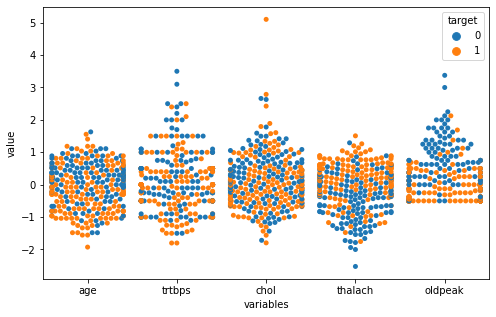

In [70]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='variables', y='value', hue = 'target', data=melted_data)
plt.show()

#### 4.2.6 Numerical Variables - Categorical Variables (Analysis with Swarm Plot)

In [71]:
categorical_var

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

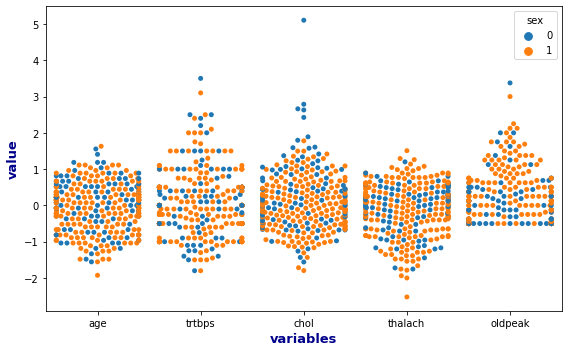

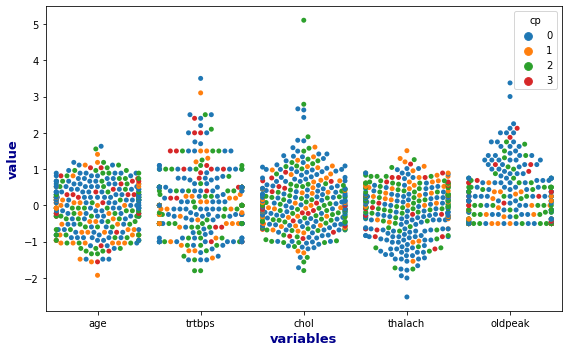

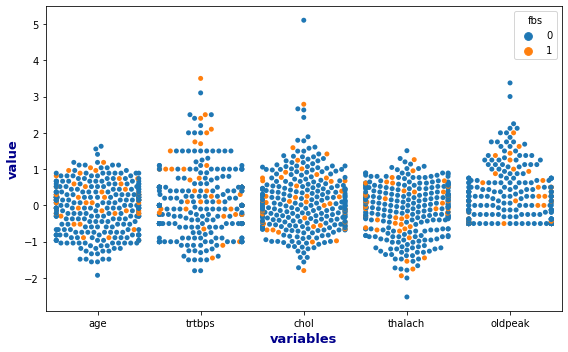

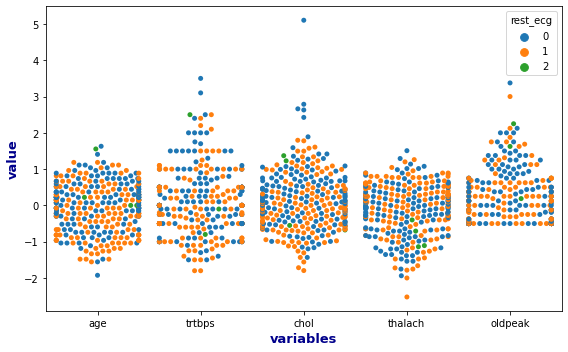

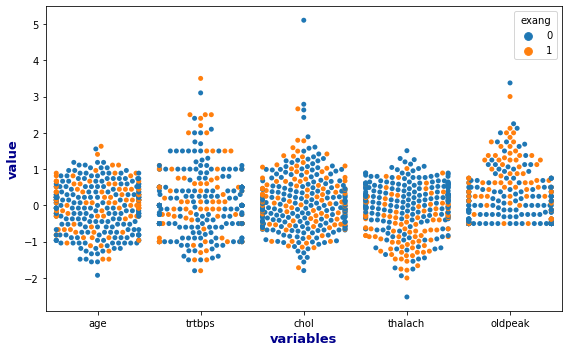

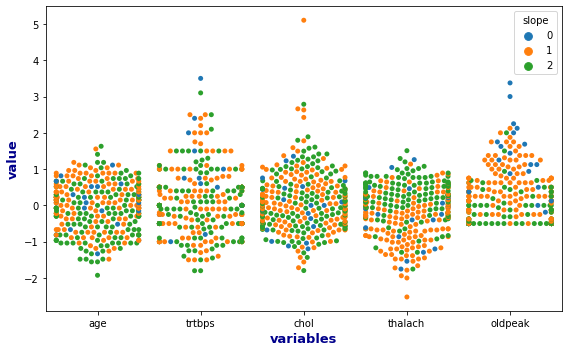

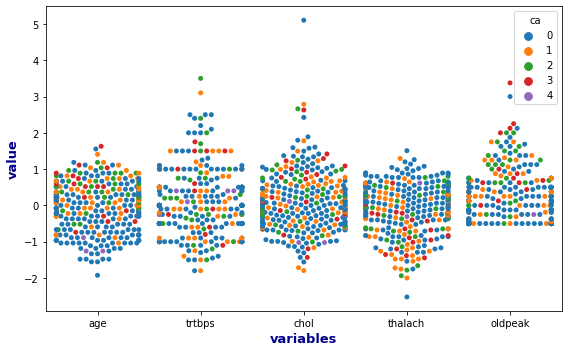

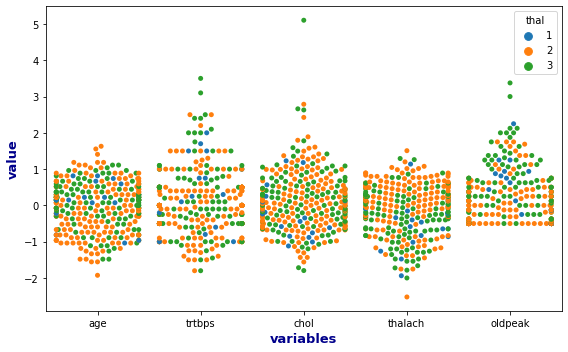

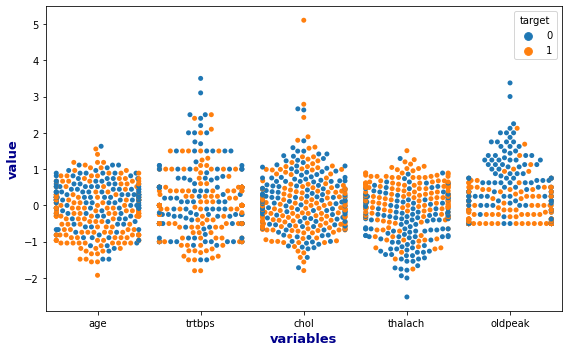

In [72]:
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in df[categorical_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = 'variables', value_name = 'value')
    plt.figure(figsize=(8,5))
    sns.swarmplot(x='variables', y='value', hue = i, data=melted_data)
    plt.xlabel('variables', fontdict = axis_font)
    plt.ylabel('value', fontdict = axis_font)
    
    plt.tight_layout ()
    plt.show()

#### 4.2.7 Numerical Variables - Catego

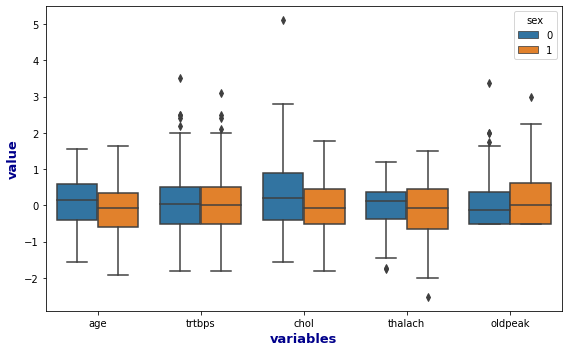

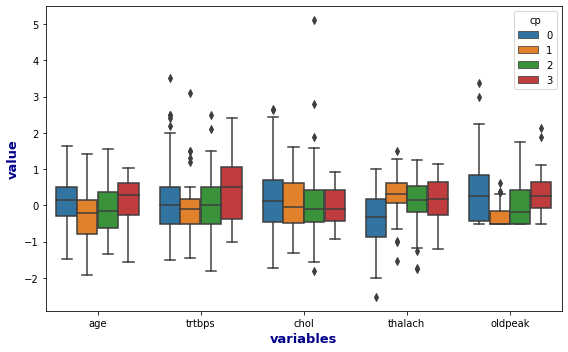

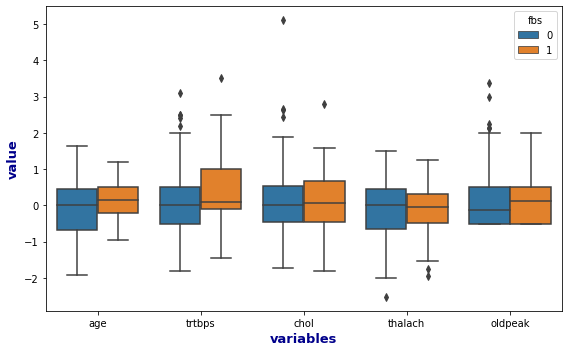

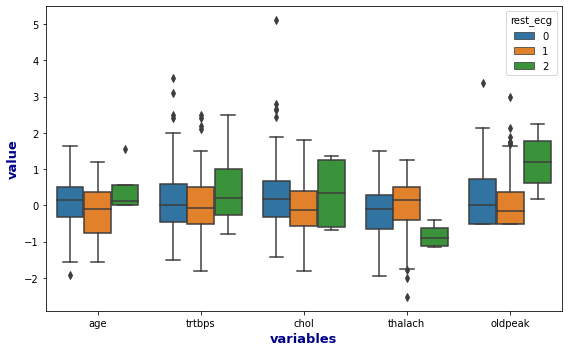

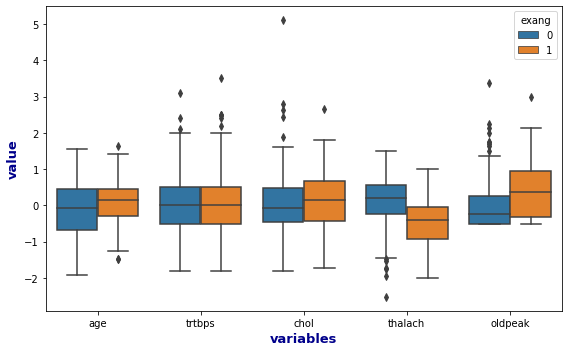

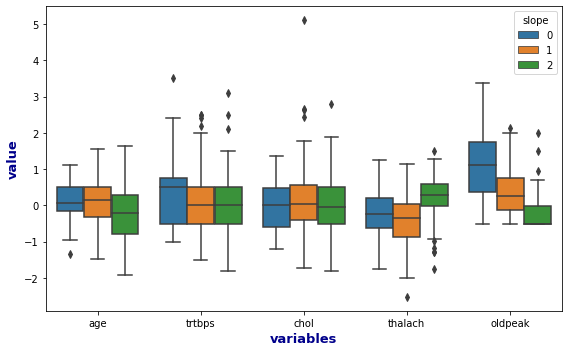

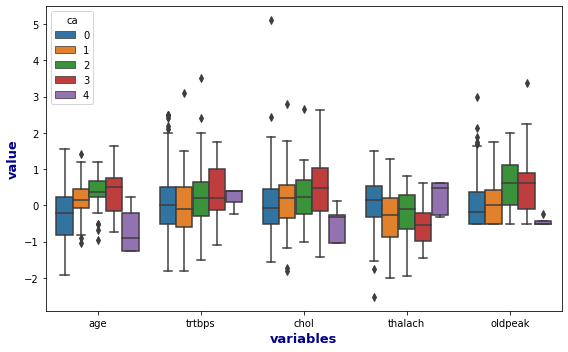

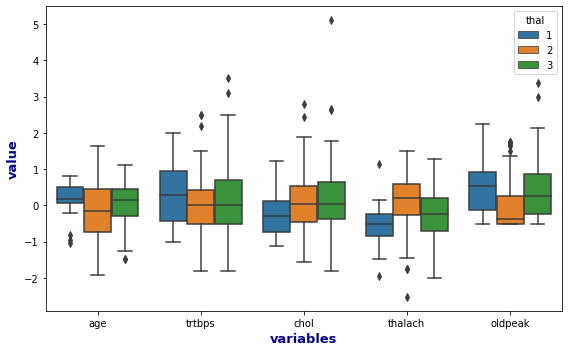

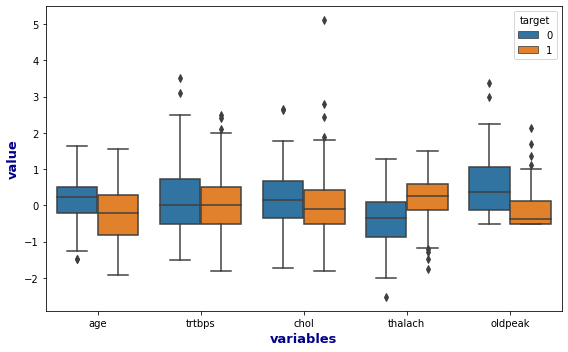

In [73]:
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in df[categorical_var]:
    df_new = pd.concat([df_scaled, df.loc[:, i]], axis = 1)
    melted_data = pd.melt(df_new, id_vars = i, var_name = 'variables', value_name = 'value')
    plt.figure(figsize=(8,5))
    sns.boxplot(x='variables', y='value', hue = i, data=melted_data)
    plt.xlabel('variables', fontdict = axis_font)
    plt.ylabel('value', fontdict = axis_font)
    
    plt.tight_layout ()
    plt.show()

#### 4.2.8 Relationships between variables(Analysis with Heatmap)

In [74]:
df_scaled

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [75]:
df_new2 = pd.concat([df_scaled, df[categorical_var]], axis =1)

In [76]:
df_new2

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [77]:
df_new2.corr()

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


<AxesSubplot:>

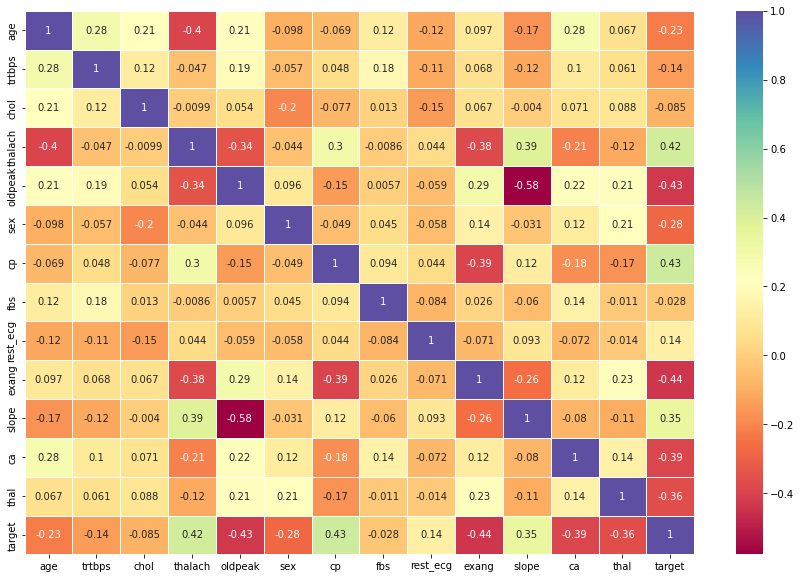

In [78]:
plt.figure(figsize=(15,10))

sns.heatmap(data = df_new2.corr(), annot=True, cmap = 'Spectral', linewidths=0.5)